Task 1&2

In [1]:
import gensim.downloader as api
nameT1 = "word2vec-google-news-300"
nameC1 = "glove-twitter-200"
nameC2 = "glove-wiki-gigaword-200"
nameC3 = "glove-twitter-25"
nameC4 ="glove-twitter-100"

#Model Task 1
google300 = api.load(nameT1)

#Model C1
twitter200 = api.load(nameC1)

#Model C2
wiki200 = api.load(nameC2)

#Model C3
twitter25 = api.load(nameC3)

#Model C4
twitter100 = api.load(nameC4)


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 758.5/758.5MB downloaded
[==================================================] 100.0% 252.1/252.1MB downloaded
[==================================================] 100.0% 104.8/104.8MB downloaded
[==================================================] 100.0% 387.1/387.1MB downloaded


In [15]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

synonymFilepath = '/content/synonym.csv'
data = pd.read_csv(synonymFilepath)
question_words = np.array(data.pop("question"))
answer_words = np.array(data.pop("answer"))
option_words = np.array(data)

labelsT1 = np.empty((80,), dtype = np.dtype('U7'))
labelsC1 = np.empty((80,), dtype = np.dtype('U7'))
labelsC2 = np.empty((80,), dtype = np.dtype('U7'))
labelsC3 = np.empty((80,), dtype = np.dtype('U7'))
labelsC4 = np.empty((80,), dtype = np.dtype('U7'))

In [4]:
def word_guesser(model, labels, modelName):
  detailsFile = open("%s%s" % (modelName,'-details.csv'), 'w')
  detailsFile.write('question-word,answer-word,model guess word,label\n')
  i = 0
  while i<len(question_words):
    missing_options = 0
    try:
      model[question_words[i]]
    except KeyError:
      labels[i] = 'guess'
      detailsFile.write('%s,%s,%s,%s\n' % (question_words[i], answer_words[i], '', 'guess'))
      i+=1
      continue
    for j in option_words[i]:
      try:
        model[j]
      except KeyError:
        missing_options+=1
    if missing_options == 4:
      labels[i] = 'guess'
      detailsFile.write('%s,%s,%s,%s\n' % (question_words[i], answer_words[i], '', 'guess'))
      i+=1
      continue
    score = 0
    best_word = 0
    ##########################################

    for j in option_words[i]:
      try:
        if score < model.similarity(question_words[i], j):
          score = model.similarity(question_words[i], j)
          best_word = j
      except KeyError:
        continue
    if best_word == answer_words[i]:
      labels[i] = 'correct'
      detailsFile.write('%s,%s,%s,%s\n' % (question_words[i], answer_words[i], best_word, 'correct'))
      i+=1
    else:
      labels[i] = 'wrong'
      detailsFile.write('%s,%s,%s,%s\n' % (question_words[i], answer_words[i], best_word, 'wrong'))
      i+=1

  detailsFile.close()

word_guesser(google300, labelsT1, nameT1)
word_guesser(twitter200, labelsC1, nameC1)
word_guesser(wiki200, labelsC2, nameC2)
word_guesser(twitter25, labelsC3, nameC3)
word_guesser(twitter100, labelsC4, nameC4)

In [5]:
labelsT1_correct = np.count_nonzero(np.where(labelsT1 == "correct",1,0))
labelsT1_wrong = np.count_nonzero(np.where(labelsT1 == 'wrong',1,0))
labelsT1_guess = np.count_nonzero(np.where(labelsT1 == "guess",1,0))

labelsC1_correct = np.count_nonzero(np.where(labelsC1 == "correct",1,0))
labelsC1_wrong = np.count_nonzero(np.where(labelsC1 == 'wrong',1,0))
labelsC1_guess = np.count_nonzero(np.where(labelsC1 == "guess",1,0))

labelsC2_correct = np.count_nonzero(np.where(labelsC2 == "correct",1,0))
labelsC2_wrong = np.count_nonzero(np.where(labelsC2 == 'wrong',1,0))
labelsC2_guess = np.count_nonzero(np.where(labelsC2 == "guess",1,0))

labelsC3_correct = np.count_nonzero(np.where(labelsC3 == "correct",1,0))
labelsC3_wrong = np.count_nonzero(np.where(labelsC3 == 'wrong',1,0))
labelsC3_guess = np.count_nonzero(np.where(labelsC3 == "guess",1,0))

labelsC4_correct = np.count_nonzero(np.where(labelsC4 == "correct",1,0))
labelsC4_wrong = np.count_nonzero(np.where(labelsC4 == 'wrong',1,0))
labelsC4_guess = np.count_nonzero(np.where(labelsC4 == "guess",1,0))

In [7]:
analysis = open("analysis.csv", 'w')
analysis.write("model name,size of vocabulary,number of correct labels (C), number of labels that aren't 'guess' (V),model accuracy (C/V)\n")

122

In [8]:
analysis.write("%s,%d,%d,%d,%.16f\n" % (nameC1,len(google300), labelsT1_correct, labelsT1_correct+labelsT1_wrong, labelsT1_correct/(labelsT1_correct+labelsT1_wrong)))
analysis.write("%s,%d,%d,%d,%.16f\n" % (nameC1,len(twitter200), labelsC1_correct, labelsC1_correct+labelsC1_wrong,labelsC1_correct/(labelsC1_correct+labelsC1_wrong)))
analysis.write("%s,%d,%d,%d,%.16f\n" % (nameC2,len(wiki200), labelsC2_correct, labelsC2_correct+labelsC2_wrong,labelsC2_correct/(labelsC2_correct+labelsC2_wrong)))
analysis.write("%s,%d,%d,%d,%.16f\n" % (nameC3,len(twitter25), labelsC3_correct, labelsC3_correct+labelsC3_wrong,labelsC3_correct/(labelsC3_correct+labelsC3_wrong)))
analysis.write("%s,%d,%d,%d,%.16f\n" % (nameC4,len(twitter100), labelsC4_correct, labelsC4_correct+labelsC4_wrong,labelsC4_correct/(labelsC4_correct+labelsC4_wrong)))

51

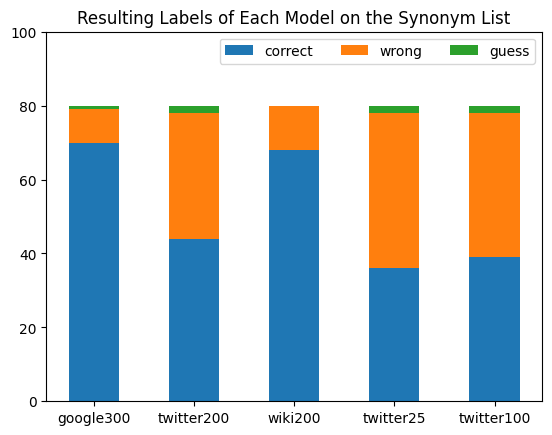

In [9]:
models = (
    'google300',
    'twitter200',
    'wiki200',
    'twitter25',
    'twitter100',
)

values = {
    'correct': np.array([labelsT1_correct,labelsC1_correct,labelsC2_correct,labelsC3_correct,labelsC4_correct]),
    'wrong': np.array([labelsT1_wrong,labelsC1_wrong,labelsC2_wrong,labelsC3_wrong,labelsC4_wrong]),
    'guess': np.array([labelsT1_guess,labelsC1_guess,labelsC2_guess,labelsC3_guess,labelsC4_guess])
}


fig, ax = plt.subplots(1,1)

bottom = np.zeros(5)

for boolean, values in values.items():
    p = ax.bar(models, values, width=0.5, label=boolean, bottom=bottom)
    bottom += values

ax.set_title('Resulting Labels of Each Model on the Synonym List')
ax.legend(loc='upper right', ncol=3)
ax.set_ylim(bottom=0, top=100)
plt.show();

Task 3

In [16]:
import numpy as np
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Function to download and preprocess HTML content from a URL
def preprocess_html(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text()
    sentences = [word_tokenize(sentence.lower()) for sentence in sent_tokenize(text)]
    return sentences

# Function to process multiple URLs
def preprocess_html_files_for_multiple_urls(urls):
    results = []
    for url in urls:
        results.extend(preprocess_html(url))
    return results

# URLs for the five books
urls = [

    'https://www.gutenberg.org/cache/epub/72177/pg72177-images.html',
    'https://www.gutenberg.org/cache/epub/72122/pg72122-images.html',
    'https://www.gutenberg.org/cache/epub/72179/pg72179-images.html',
    'https://www.gutenberg.org/cache/epub/72182/pg72182-images.html',
    'https://www.gutenberg.org/cache/epub/72178/pg72178-images.html'
]

# Concatenate the tokenized sentences from all books
all_sentences = preprocess_html_files_for_multiple_urls(urls)

# Function to train Word2Vec model
def train_word_to_vec(sentences, window_size, embedding_size):
    trained_model = gensim.models.Word2Vec(sentences, window=window_size, vector_size=embedding_size)
    trained_model.train(sentences, total_examples=len(sentences), epochs=trained_model.epochs)
    return trained_model

# Train Word2Vec models with different parameters
model_1 = train_word_to_vec(all_sentences, 5, 100)
model_2 = train_word_to_vec(all_sentences, 5, 300)
model_3 = train_word_to_vec(all_sentences, 10, 100)
model_4 = train_word_to_vec(all_sentences, 10, 300)


synonym = pd.read_csv(synonymFilepath)
def get_results(model):
    results = {"question": [], "answer": [], "prediction": [], "label": []}
    for row in synonym.iterrows():
        predictions = []
        question = row[1]["question"]
        answer = row[1]["answer"]
        options = [row[1]["0"], row[1]["1"], row[1]["2"], row[1]["3"]]
        if isinstance(model, gensim.models.Word2Vec) and question in model.wv:
            for option in options:
                if option in model.wv:
                    predictions.append([option, model.wv.similarity(option, question)])
            if len(predictions) != 4:
                label = 'guess'
            else:
                prediction = max(predictions, key=lambda x: x[1])
                if prediction[0] == answer:
                    label = 'correct'
                else:
                    label = 'wrong'
        else:
            label = 'guess'
            prediction = [row[1][str(np.random.randint(0, 4))]]
        results["question"].append(question)
        results["answer"].append(answer)
        results["prediction"].append(prediction[0])
        results["label"].append(label)
    return results

def create_model_details(model, model_name):
    results = get_results(model)
    model_csv_file = f"{model_name}-details.csv"
    with open(model_csv_file, 'w') as f:
        f.write("Question,Answer,Guess,Label\n")
        for i in range(len(results["question"])):
            f.write(f"{results['question'][i]},{results['answer'][i]},{results['prediction'][i]},{results['label'][i]}\n")
    with open("analysis.csv", 'a') as f:
        f.write(f"{model_name},{len(results['question'])},{results['label'].count('correct')},{len(results['question']) - results['label'].count('guess')},{results['label'].count('correct') / (len(results['question']) - results['label'].count('guess')) if (len(results['question']) - results['label'].count('guess')) > 0 else 0}\n")

# Create the model details for each model
create_model_details(model_1, "word2vec-5-100")
create_model_details(model_2, "word2vec-5-300")
create_model_details(model_3, "word2vec-10-100")
create_model_details(model_4, "word2vec-10-300")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
analysis.close()

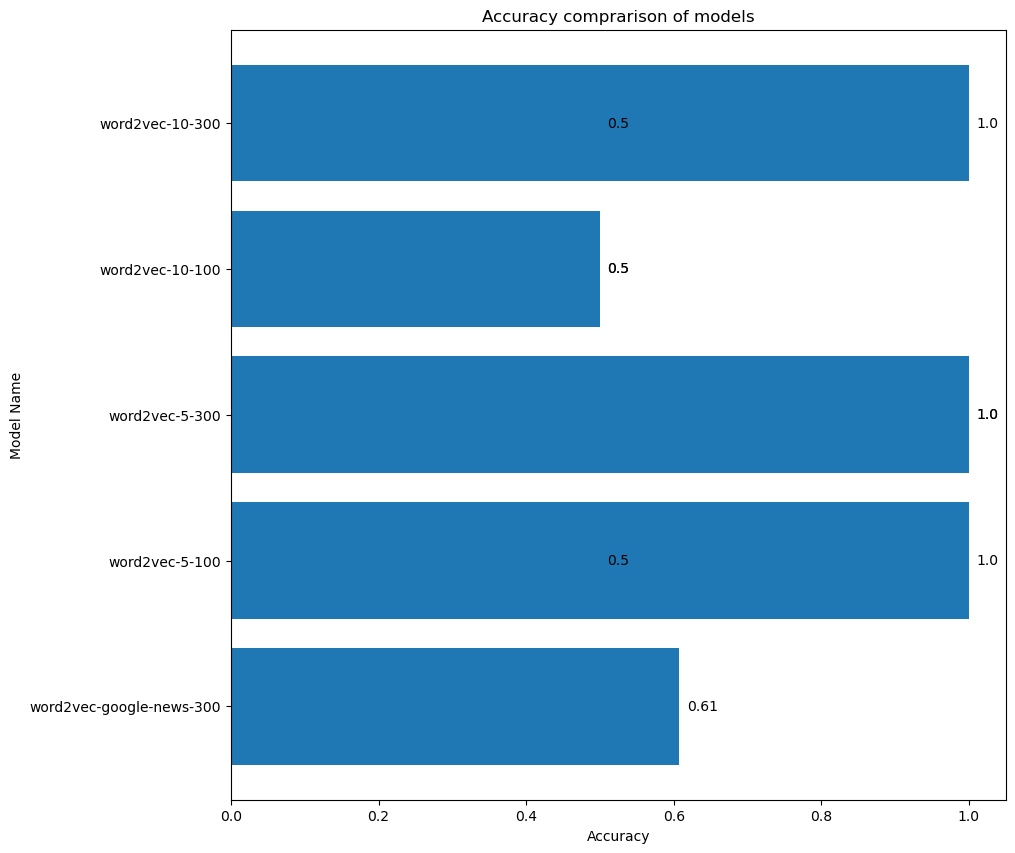

In [ ]:

# Plot the accuracy for each model
# Read the analysis.csv file
df = pd.read_csv('analysis.csv', sep=",",header=0)

plt.figure(figsize=(10, 10))
bars = plt.barh(df['Model Name'], df['Accuracy'])

# Annotate each bar with its value
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')

plt.title('Accuracy comprarison of models')
plt.ylabel('Model Name')
plt.xlabel('Accuracy')
plt.show()